# Black Litterman Mean Risk Optimization

## 1. Downloading the data:

| 티커  | 설명 | 
|-------|------|
| **JCI** | Johnson Controls International plc: 건물 제품 및 시스템을 설계, 제조, 설치 및 서비스하는 글로벌 기업. 주로 상업용 HVAC 시스템, 통합 전자 보안 시스템 및 화재 감지 및 진압 시스템을 제공합니다. |
| **TGT** | Target Corporation: 미국의 대형 소매 체인으로, 다양한 소비자 제품을 판매하며 온라인과 오프라인 매장을 운영합니다. |
| **CMCSA** | Comcast Corporation: 미국의 미디어 및 기술 회사로, 케이블 TV, 인터넷, 전화 서비스 및 NBCUniversal을 통해 콘텐츠 제작 및 배급을 담당합니다. |
| **CPB** | Campbell Soup Company: 미국의 식품 회사로, 수프, 스낵, 음료 및 기타 식품 제품을 제조 및 판매합니다. |
| **MO** | Altria Group, Inc.: 주로 담배, 시가, 와인 등의 제품을 제조 및 판매하는 회사입니다. |
| **APA** | APA Corporation: 미국의 석유 및 천연가스 탐사 및 생산 회사입니다. |
| **MMC** | Marsh & McLennan Companies, Inc.: 글로벌 전문 서비스 회사로, 리스크 관리, 보험 중개, 재보험 중개, 인재 관리 및 투자 컨설팅 서비스를 제공합니다. |
| **JPM** | JPMorgan Chase & Co.: 글로벌 금융 서비스 회사로, 은행, 투자, 자산 관리 및 기타 금융 서비스를 제공합니다. |
| **ZION** | Zions Bancorporation: 미국 서부 지역에서 상업 은행 서비스를 제공하는 금융 기관입니다. |
| **PSA** | Public Storage: 미국의 셀프 스토리지 시설을 운영하는 회사입니다. |
| **BAX** | Baxter International Inc.: 글로벌 의료 제품 회사로, 병원 및 의료 제공자를 위한 다양한 치료 솔루션을 제공합니다. |
| **BMY** | Bristol-Myers Squibb Company: 글로벌 제약 회사로, 암, 심혈관 질환, 면역학 및 섬유화 치료제를 개발 및 판매합니다. |
| **LUV** | Southwest Airlines Co.: 미국의 저가 항공사로, 국내외 항공 서비스를 제공합니다. |
| **PCAR** | PACCAR Inc.: 중형 및 대형 트럭을 설계, 제조 및 판매하는 글로벌 기술 회사입니다. |
| **TXT** | Textron Inc.: 항공우주, 방위, 산업 및 금융 사업을 운영하는 다국적 기업입니다. |
| **TMO** | Thermo Fisher Scientific Inc.: 과학 연구, 분석 기기, 진단 및 생명 과학 분야의 제품 및 서비스를 제공하는 회사입니다. |
| **DE** | Deere & Company: 농업, 건설 및 임업 장비를 설계, 제조 및 판매하는 글로벌 회사입니다. |
| **MSFT** | Microsoft Corporation: 소프트웨어, 하드웨어, 서비스 및 솔루션을 제공하는 글로벌 기술 회사입니다. |
| **HPQ** | HP Inc.: 개인용 컴퓨터, 프린터 및 관련 액세서리를 제조 및 판매하는 글로벌 기술 회사입니다. |
| **SEE** | Sealed Air Corporation: 포장 제품 및 시스템을 설계, 제조 및 판매하는 회사입니다. |
| **VZ** | Verizon Communications Inc.: 무선 및 유선 통신 서비스를 제공하는 미국의 통신 회사입니다. |
| **CNP** | CenterPoint Energy, Inc.: 미국의 전기 및 천연가스 유틸리티 회사입니다. |
| **NI** | NiSource Inc.: 전기 및 천연가스를 제공하는 미국의 유틸리티 회사입니다. |
| **T** | AT&T Inc.: 통신 및 디지털 엔터테인먼트 서비스를 제공하는 글로벌 회사입니다. |
| **BA** | The Boeing Company: 항공기, 로터크래프트, 로켓, 위성 및 미사일을 설계, 제조 및 판매하는 글로벌 항공우주 회사입니다. |


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [5]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9482%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5866%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0049%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6572%,-2.7699%,-1.1047%,-1.9770%,-1.2207%,-0.8856%,-4.6059%,-2.5394%,...,-2.2067%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1367%,-0.7308%,-0.1448%,0.0896%,-3.3839%,-0.1117%,-1.1386%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,1.6435%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Black Litterman Portfolios

### 2.1 Calculating a reference portfolio.

In [6]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5019%,0.0000%,0.0000%,8.4808%,0.0000%,3.8194%,0.0000%,0.0000%,...,10.8262%,0.0000%,0.0000%,0.0000%,0.0000%,7.1805%,0.0000%,0.0000%,4.2740%,0.0000%


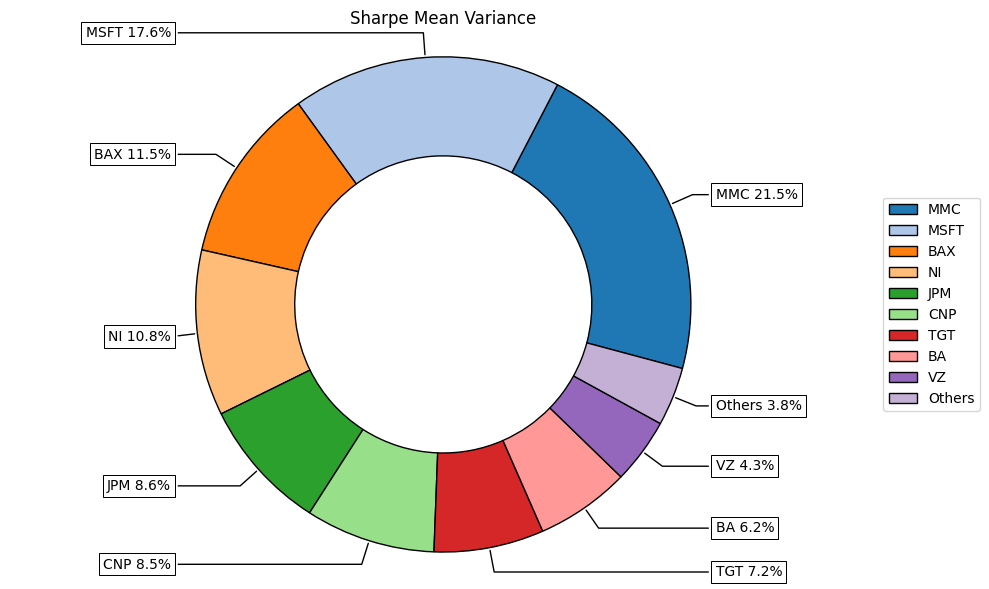

In [7]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.2 Plotting portfolio composition

In [8]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Consumer Staples', 'Materials'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.08, 0.1, 0.09], # Annual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financials', 'Utilities', 'Industrials']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Industry,Energy,>=,8.0000%,Classes,Industry,Financials
1,False,Classes,Industry,Consumer Staples,>=,10.0000%,Classes,Industry,Utilities
2,False,Classes,Industry,Materials,>=,9.0000%,Classes,Industry,Industrials


In [9]:
P, Q = rp.assets_views(views, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2
0,100.0000%,0.0000%,0.0000%
1,-20.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%
5,0.0000%,-50.0000%,0.0000%
6,0.0000%,50.0000%,0.0000%
7,0.0000%,0.0000%,-25.0000%
8,0.0000%,0.0000%,0.0000%
9,0.0000%,0.0000%,0.0000%


,0
0,8.0000%
1,10.0000%
2,9.0000%


In [10]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.5319%,5.0300%,11.1758%,0.0039%,0.0000%,2.3433%,5.8447%,0.6343%,0.0000%,0.0000%,...,4.8612%,0.0000%,0.0000%,8.1605%,0.0000%,6.8848%,0.0000%,0.0000%,4.5132%,0.0000%


연간 수익률을 일간 수익률로 변환하는 이유는 데이터의 시간 단위가 일간 수익률로 되어 있기 때문입니다. 이를 통해 Black-Litterman 모델의 입력 값들이 동일한 시간 단위로 맞추어집니다. 자세히 설명하겠습니다.

### 이유

1. **일관된 시간 단위**:
   - Black-Litterman 모델에서 기대 수익률과 리스크(공분산)는 동일한 시간 단위로 계산되어야 합니다.
   - 다운로드된 데이터와 계산된 공분산 행렬이 일간 단위로 되어 있는 경우, 전망 수익률도 같은 단위로 변환해야 일관성을 유지할 수 있습니다.

2. **정확한 계산**:
   - 연간 수익률을 일간 수익률로 변환하여, 모델에서 일간 수익률을 기반으로 한 공분산 행렬과 함께 사용할 수 있습니다.
   - 이를 통해 포트폴리오 최적화가 정확하게 수행됩니다.

3. **Black-Litterman 모델의 특성**:
   - Black-Litterman 모델은 수익률 벡터(전망)와 공분산 행렬을 결합하여 최적의 포트폴리오를 생성합니다.
   - 이때, 수익률 벡터와 공분산 행렬이 동일한 시간 단위로 표현되지 않으면, 최적화 과정에서 잘못된 결과를 초래할 수 있습니다.

### 연간 수익률을 일간 수익률로 변환하는 방법

연간 수익률을 일간 수익률로 변환하는 가장 간단한 방법은 연간 수익률을 252(일반적인 금융 시장의 거래 일수)로 나누는 것입니다. 이렇게 하면 연간 수익률을 일간 수익률로 변환할 수 있습니다.

예를 들어, 연간 수익률이 0.02(2%)인 경우:
$$ \text{일간 수익률} = \frac{0.02}{252} \approx 0.000079 $$

### 예제 코드

```python
# 연간 수익률을 일간 수익률로 변환하여 전망 설정
Q = np.array([[0.02], [0.015]])  # 연간 수익률 전망
Q_daily = Q / 252  # 일간 수익률로 변환

# Black-Litterman 입력값 추정
port.blacklitterman_stats(P, Q_daily, rf=rf, w=w, delta=None, eq=True)
```

### 결론

연간 수익률을 일간 수익률로 변환하는 것은 Black-Litterman 모델의 입력값들이 일관된 시간 단위로 계산되도록 하여, 포트폴리오 최적화 과정에서 정확하고 신뢰할 수 있는 결과를 얻기 위함입니다. 이렇게 하면 전망 수익률과 공분산 행렬이 동일한 시간 단위로 맞추어져, 모델의 계산이 정확하게 이루어집니다.

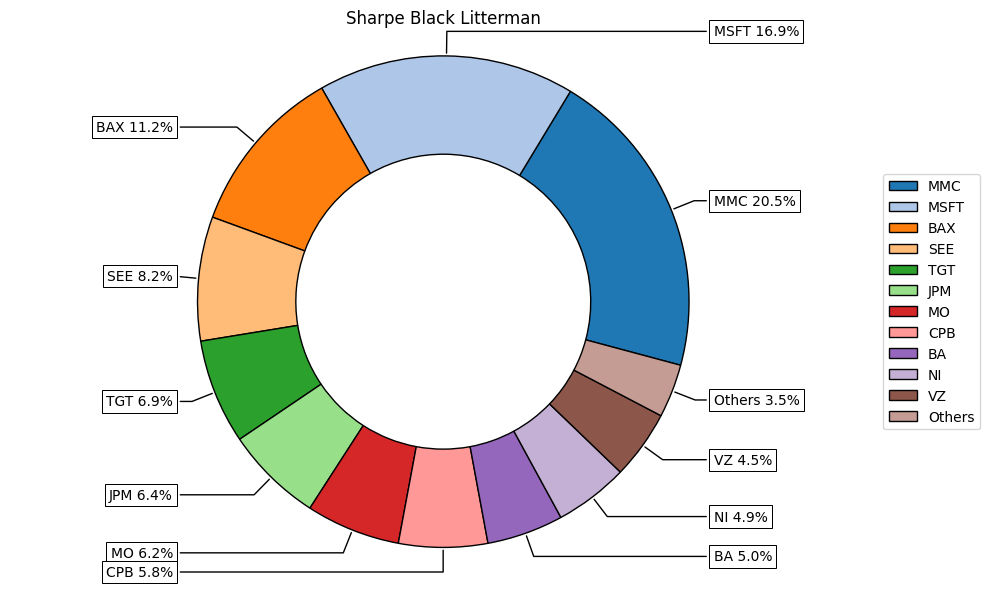

In [11]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [12]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9907%,3.2270%,0.0743%,0.0000%,2.8447%,...,11.4528%,0.0000%,14.9246%,0.1680%,6.5904%,4.0900%,0.0000%,0.0000%,8.2766%,0.0000%
1,0.0000%,1.8830%,7.9579%,2.9165%,1.6406%,5.5446%,4.1149%,0.5323%,0.0000%,1.7322%,...,9.3255%,0.0000%,9.7755%,3.0748%,4.1232%,5.1901%,0.0000%,0.0000%,6.9796%,0.0000%
2,0.0000%,2.6285%,8.7004%,2.2994%,1.2735%,4.9390%,4.5122%,0.6084%,0.0000%,1.2641%,...,8.4069%,0.0000%,7.6806%,4.2311%,3.2355%,5.5890%,0.0000%,0.0000%,6.4598%,0.0000%
3,0.0856%,3.1842%,9.2640%,1.8158%,0.9420%,4.4198%,4.8235%,0.6471%,0.0000%,0.8588%,...,7.6801%,0.0000%,5.9971%,5.1202%,2.4840%,5.8910%,0.0000%,0.0000%,6.0814%,0.0000%
4,0.2000%,3.6362%,9.7324%,1.4016%,0.6188%,3.9501%,5.0862%,0.6643%,0.0000%,0.4799%,...,7.0460%,0.0000%,4.5151%,5.8624%,1.7949%,6.1410%,0.0000%,0.0000%,5.7825%,0.0000%


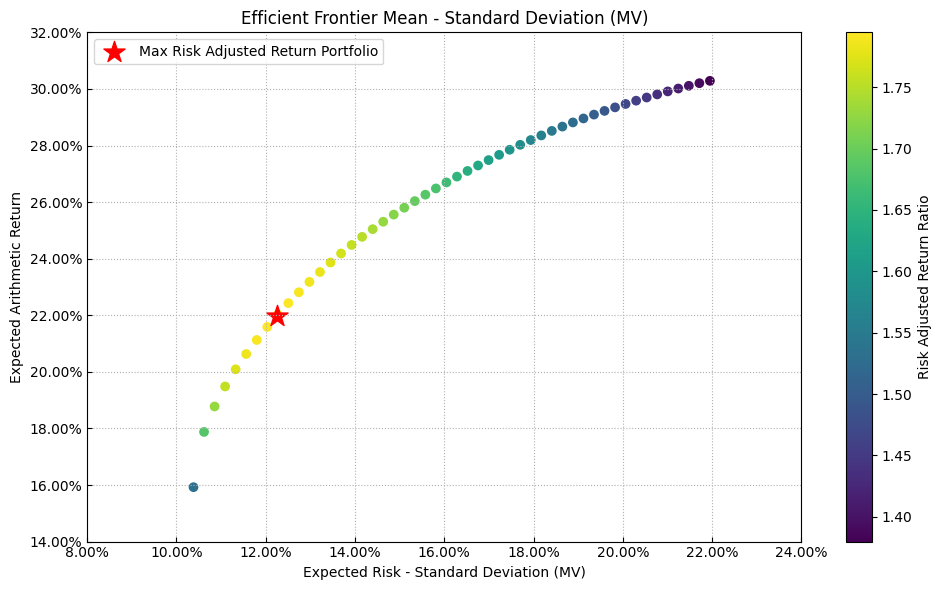

In [13]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

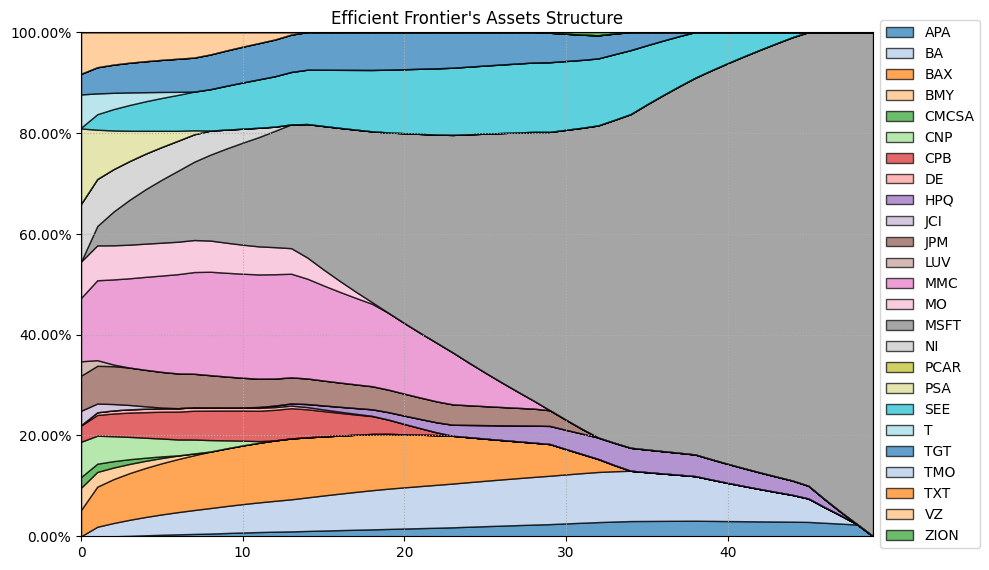

In [14]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Black Litterman Mean Risk Portfolios

### 3.4 Calculate Black Litterman Portfolios for Several Risk Measures

In [15]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [16]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.53%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,5.03%,6.06%,3.10%,4.27%,2.82%,0.00%,0.00%,0.00%,0.00%,8.05%,2.64%,6.75%,0.00%
BAX,11.18%,8.54%,10.66%,8.55%,10.66%,11.94%,7.32%,0.00%,0.00%,3.50%,0.00%,4.20%,0.00%
BMY,0.00%,2.11%,0.00%,3.01%,0.00%,0.00%,4.13%,8.94%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,2.34%,3.26%,1.92%,2.99%,1.58%,2.27%,2.20%,0.00%,52.20%,11.94%,31.88%,16.09%,39.44%
CPB,5.84%,2.39%,6.71%,4.20%,7.18%,10.57%,17.55%,15.82%,0.00%,2.11%,0.17%,0.00%,0.00%
DE,0.63%,1.56%,0.00%,0.22%,0.00%,0.00%,0.00%,0.00%,5.92%,0.09%,0.05%,0.00%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.54%,0.00%,0.00%,0.00%


<Axes: >

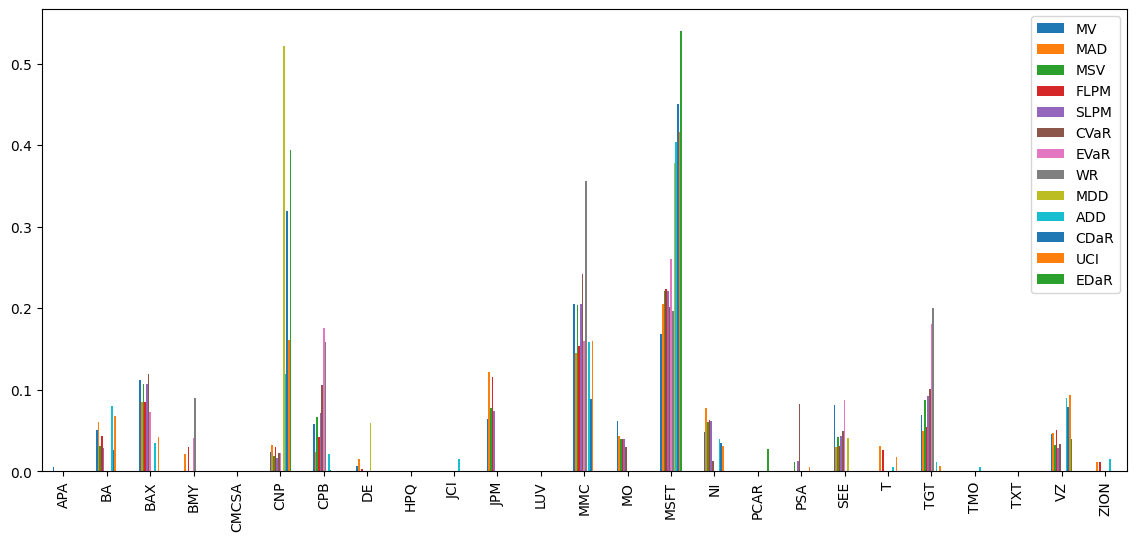

In [17]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)